### Activate inline plotting

In [1]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


### Loading data

In [2]:
from data import Dataset

In [3]:
dataset = Dataset('../data/signal_TDR.root')

### Positions of wires

In [4]:
rhos, phis = dataset.get_wires_rhos_and_phis()

In [5]:
rhos

array([ 51.4,  51.4,  51.4, ...,  81.8,  81.8,  81.8])

### Energy deposits

In [6]:
dataset.get_energy_deposits(event_id=0)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

### Benchmarking the time needed to load all the events

In [7]:
dataset.n_events

3445

In [8]:
%%time
for i in range(dataset.n_events):
    z = dataset.get_energy_deposits(i)

CPU times: user 209 ms, sys: 1.99 ms, total: 211 ms
Wall time: 210 ms


### Drawing

In [9]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)    

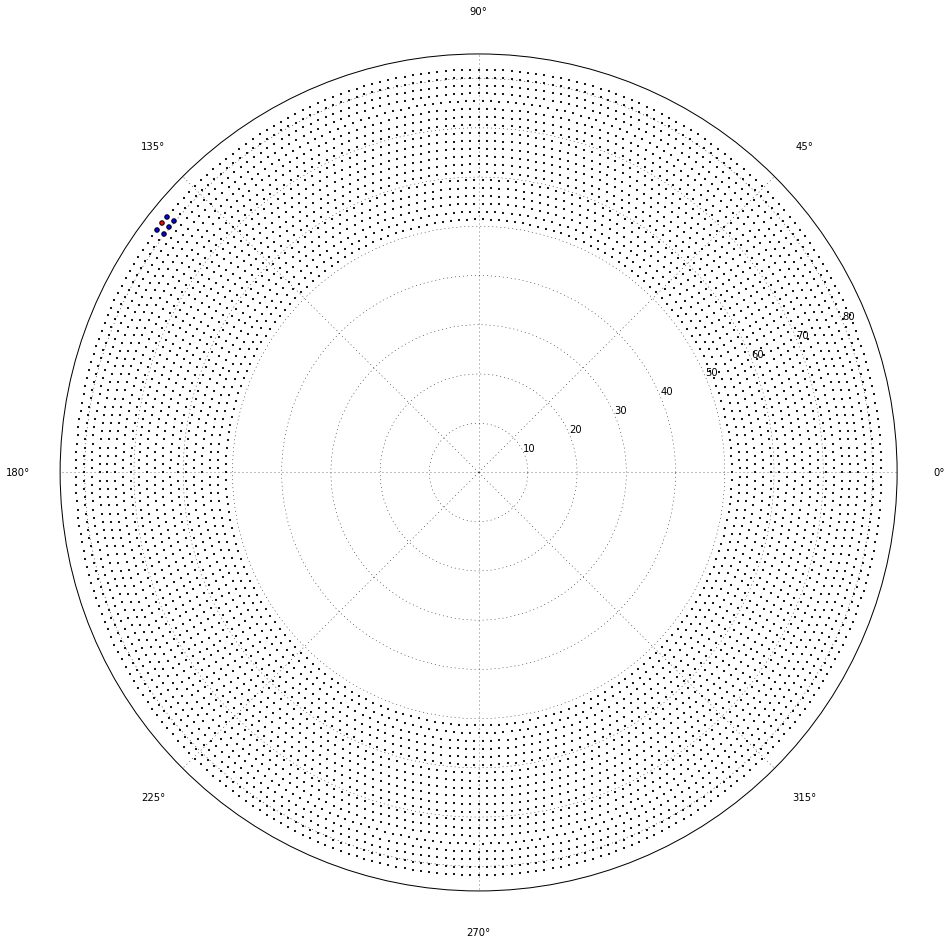

In [17]:
from scipy.sparse import *
setup_plot_for_detector()
scatter(phis, rhos, marker='.', s=5)

wire1 = 4800
neigh1 = find(dataset.neighbours_table[wire1,:])[1]
scatter(phis[neigh1],rhos[neigh1], marker='o', c='b')
scatter(phis[wire1],rhos[wire1], marker='o', c='r')

### Drawing deposited energies

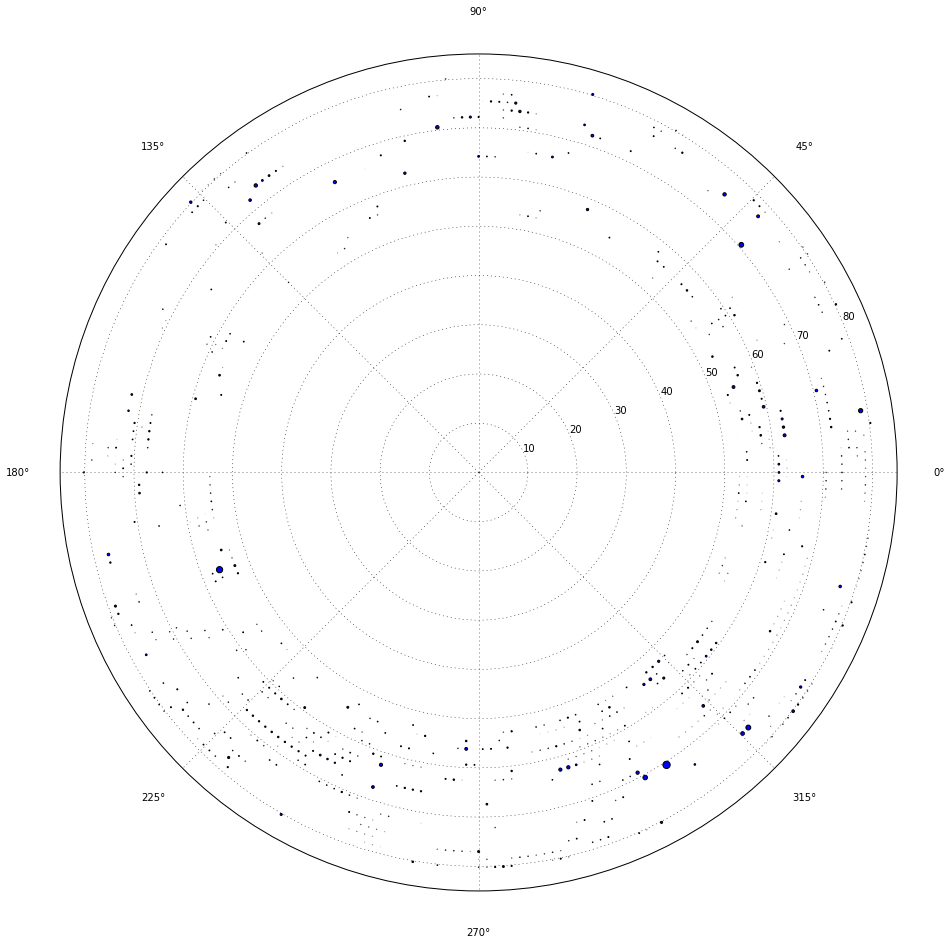

In [11]:
setup_plot_for_detector()
scatter(phis, rhos, dataset.get_energy_deposits(event_id=0) * 20000)

## Drawing deposits and labels 

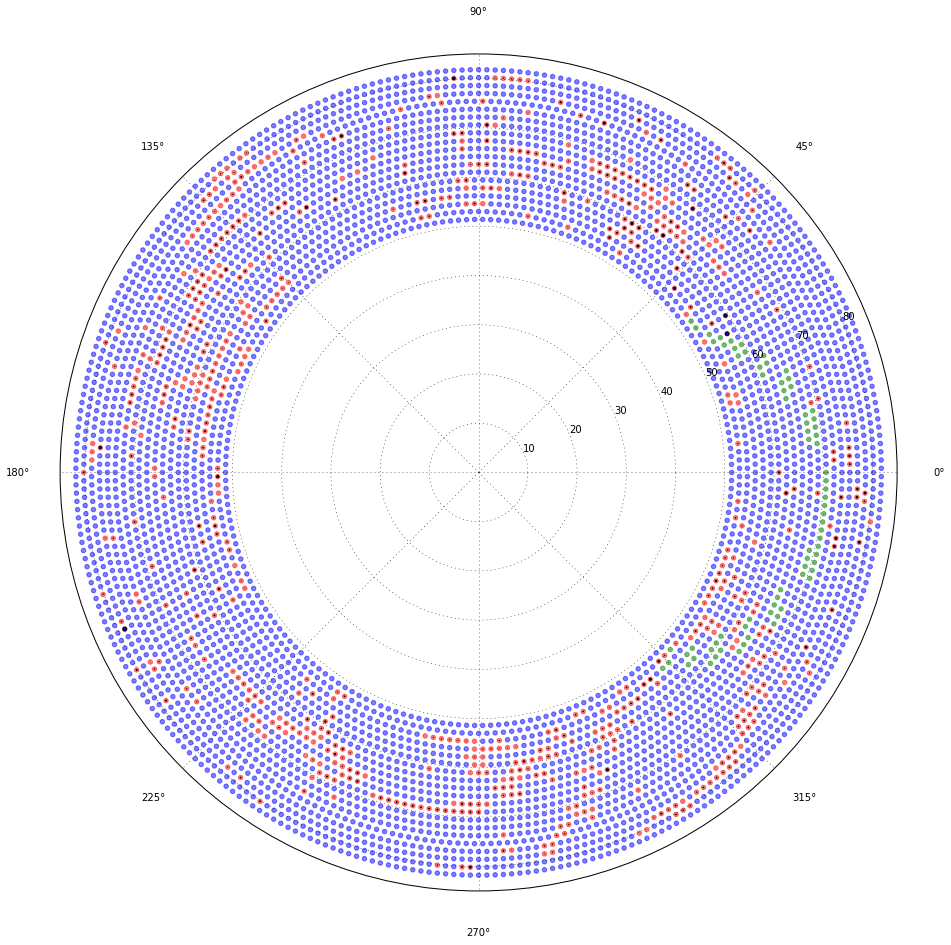

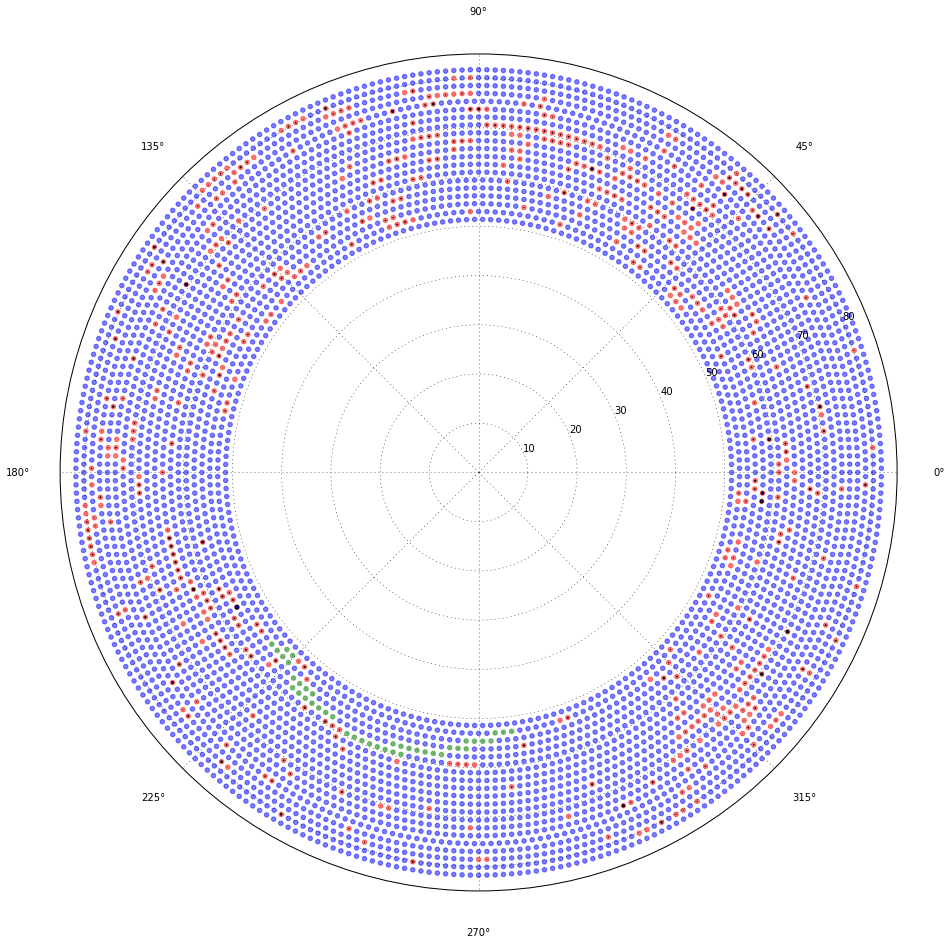

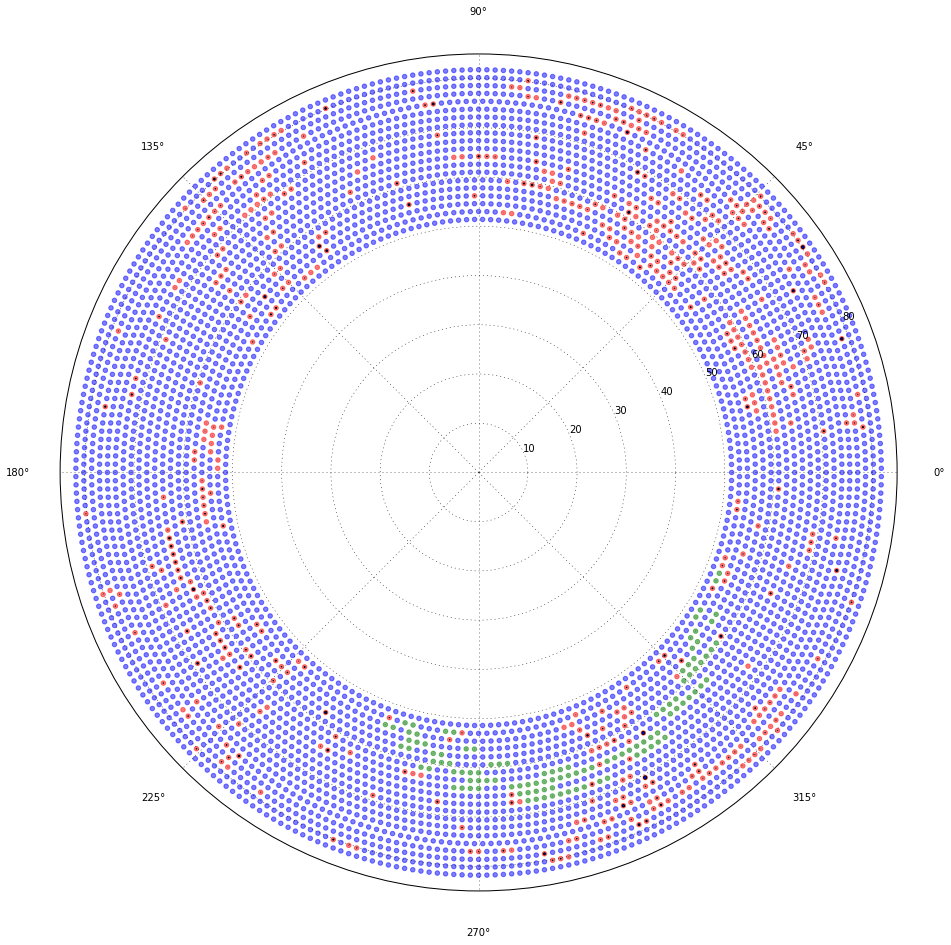

In [12]:
for event_id in [1, 4, 5]:
    setup_plot_for_detector()
    scatter(phis, rhos, color=numpy.take(list('bgrr'), dataset.get_hit_types(event_id)) , alpha=0.5)
    scatter(phis, rhos, dataset.get_energy_deposits(event_id=event_id) * 10000)
    show()